# Quantifying Shakespeare

In this notebook we will find the frequencies with which Shakespeare's words used letters. 

In [3]:
from io import TextIOWrapper

def read_file(filename: str) -> list[str]: 
    """Given the name of a file, return a list of its lines."""
    lines: list[str] = []
    file: TextIOWrapper = open(filename, "r", encoding="utf8")
    for line in file:
        line = line.strip()
        line = line.lower()
        lines.append(line)
        if line!= "":
            lines.append(line)
    return lines


shakespeare_lines: list[str] = read_file("./shakespeare.txt")
print(len(shakespeare_lines))
print(shakespeare_lines[246:251])

238836
['if the true concord of well-tuned sounds,', 'by unions married do offend thine ear,', 'by unions married do offend thine ear,', 'they do but sweetly chide thee, who confounds', 'they do but sweetly chide thee, who confounds']


The next step of our analysis is to count the letters in the lines list one-by-one to find the frequency of use of each letter. 

In [5]:
# Goal: Define a function named `tally`
# Give the function (as params) a dicitonary refrence (key: str, value:int) and a key 
# If the key is in the dicitonary, increase value by 1 
# Otherwise, set the keys value to 1

def tally(counts: dict[str, int], key: str) -> None:
    """Mutate counts to increment a key by 1 if it exists, or initialize to 1."""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1


def count_letters(lines: list[str]) -> dict[str, int]:
    """Count frequencies of all letters in a list of strings.""" 
    counts: dict[str, int] = {}
    # loop through all lines
    # for each line loop through all characters
    # tally character into the counts dictionary
    # Extra is to tally only letters! no numbers or punctuation
    for line in lines:
        for char in line: 
            if char.isalpha():
                tally(counts, char)
    return counts


shakespeare_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakespeare_letters)


{'t': 657974, 'h': 473168, 'e': 892294, 's': 497036, 'o': 627780, 'n': 485502, 'b': 123576, 'y': 188346, 'w': 178572, 'i': 506658, 'l': 339314, 'a': 577188, 'm': 222438, 'k': 70724, 'p': 116498, 'r': 474500, 'f': 160666, 'c': 175678, 'u': 257394, 'd': 298254, 'g': 136108, 'v': 74994, 'z': 3252, 'x': 10434, 'q': 7154, 'j': 9504}


Let's create a visualization of this data with a bar chart. 

In [11]:
items_in_dict: list[tuple[str, int]] = list(shakespeare_letters.items())
items_in_dict = sorted(items_in_dict)
sorted_letters: dict[str, int] = dict(items_in_dict)
print(sorted_letters)

{'a': 577188, 'b': 123576, 'c': 175678, 'd': 298254, 'e': 892294, 'f': 160666, 'g': 136108, 'h': 473168, 'i': 506658, 'j': 9504, 'k': 70724, 'l': 339314, 'm': 222438, 'n': 485502, 'o': 627780, 'p': 116498, 'q': 7154, 'r': 474500, 's': 497036, 't': 657974, 'u': 257394, 'v': 74994, 'w': 178572, 'x': 10434, 'y': 188346, 'z': 3252}


['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[577188, 123576, 175678, 298254, 892294, 160666, 136108, 473168, 506658, 9504, 70724, 339314, 222438, 485502, 627780, 116498, 7154, 474500, 497036, 657974, 257394, 74994, 178572, 10434, 188346, 3252]


<BarContainer object of 26 artists>

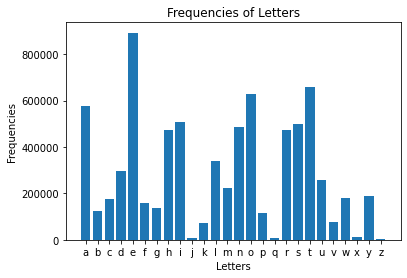

In [12]:
from matplotlib import pyplot

pyplot.title("Frequencies of Letters")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequencies")
labels: list[str] = list(sorted_letters.keys())
values: list[int] = list(sorted_letters.values())
print(labels)
print(values)
pyplot.bar(labels, values)